# Análisis de regresión

En este notebok, veremos cómo el análisis de regresión puede ayudar a  comprender el comportamiento de los datos, a predecir valores y a encontrar predictores (modelos de datos dispersos).

Presentamos diferentes modelos de regresión: Regresión lineal simple, Regresión lineal múltiple, Regresión polinomial y Regresión logística.
Evaluamos los resultados cualitativamente mediante las herramientas de visualización de Seaborn y cuantitativamente mediante la biblioteca Scikit-learn, así como con otras herramientas.

Utilizaremos diferentes data sets (reales):
* Longley dataset of US macroeconomic data
* Prediction of the Price of a New Housing Data Market
* Sea Ice Extent and Climate Change
* Advertising dataset
* Diabetes Scikit-learn dataset
* The Big Mart Sales dataset
* Football team goals

### Contenido del notebook:

- Regresión lineal simple y múltiple y mínimos cuadrados ordinarios
- Regresión polinomial
- Visualización (Seaborn)
- Predicción (Scikit-learn)
- Regularización y modelos dispersos
- Estadísticas (StatsModel)
- Regresión logística

## Cómo hacer predicciones sobre cantidades del mundo real.

+ ¿Cómo cambia el volumen de ventas con los cambios en el precio? ¿Cómo se ve afectado por el clima?
+ ¿Cómo varía la cantidad de fármaco absorbido con el peso corporal del paciente? ¿Depende de la presión arterial?
+ ¿Cuántos clientes puedo esperar hoy?
+ ¿A qué hora debo ir a casa para evitar el atasco?
+ ¿Cuál es la probabilidad de lluvia para los próximos dos lunes? ¿Cuál es la temperatura esperada?

<center><img src="files/images/crystal_ball_s.jpg"></center>

### Example:
    
 
<center><img src="files/images/life-expectancy-vs-gdp-per-capita.png"></center>


Información esperanza de vida [aquí](https://ourworldindata.org/grapher/life-expectancy-of-women-vs-life-expectancy-of-women?tab=chart&country=&region=World).


Configuraciones iniciales del notebook:

In [5]:
import matplotlib.pylab as plt
#Por defecto, matplotlib crea una figura en una ventana separada. Cuando usamos Jupyter notebooks, 
#podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline 

In [2]:
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [3]:
import numpy as np

# Configuración para visualización
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

### Notación

$x_i$ elemento de un vector, $\textbf{x}$ vector columna, $\textbf{x'}$ (transpuesta de $\textbf{x}$) vector fila, una matriz se representa como $X$.

### De la Data a Modelos

Una variable $\textbf{y}$ (*respuesta*) puede esta expresado como una combinación de una o más variables independientes $\textbf{x}_i$ (comúnmente llamadas *covariables* o *predictores* o *regresores*).

El rol del análisis de regresión es construir un modelo (función) para predecir la respuesta de las covariables.

## Modelo de Regression Lineal

El modelo más simple es el **modelo lineal**, donde la respuesta $\textbf{y}$ depende linealmente de los predictores $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} + \epsilon $$ 

Los $a_i$ se denominan *parametros* o *coeficiente* del modelo y $\epsilon$ se denomina *término de error*, *término de perturbación*, o *ruido*.

Esta ecuación se puede reescribir en una forma más compacta (matricial) como:

$$ \textbf{y}  = X \textbf{w} + \epsilon $$

Donde $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),  \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) 
 \epsilon = \left( \begin{array}{c} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_m \end{array} \right) $$
 
La **regresión lineal** es una de las técnicas más utilizadas para crear modelos lineales.
 
En una regresión lineal simple el modelo es:

$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 + \epsilon$$

El parámetro $a_0$ se llama *término constante*, *intersección*, o *independiente*.

En la forma matricial (como fue indicado en una práctica anterior) agregamos un término constante cambiando a la matriz a: $(\textbf{1},X).$


### Ejemplo: 

¿El precio del seguro depende de la experiencia de conducción?

Dada la siguiente información, los precios mensuales del seguro de automóvil ($\textbf{y}$) y la experiencia de conducción, en años ($\textbf{x}_{1}$) de un conjunto de n = 8 sujetos, podemos construir un modelo lineal para responder a esta pregunta.


<center><img src="files/images/data-insurance.png" width="500"></center>


<center><img src="files/images/price-insurance.png" width="500"></center>


También podemos predecir el precio mensual del seguro del automóvil para un conductor con 20 años de experiencia de conducción.

## Regresión lineal


Generación de un conjunto de datos para ilustrar una regresión lineal (simple).

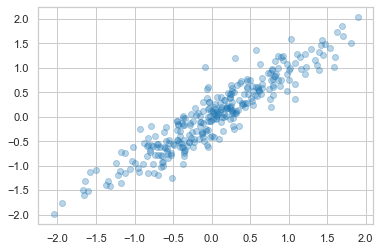

In [7]:
X1 = np.random.randn(300, 2)  # Numéros randómicos de tipo float muestreados a partir de una distribución "normal" (gaussiana) univariante
A = np.array([[0.6, .4], [.4, 0.6]]) # Matriz de transformación
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3) # alpha, valor de transparencia, entre 0 (transparente) y 1 (opaco)
plt.show()

Podemos crear un modelo lineal (de regresión) para explicar (interpolar/extrapolar) los datos:

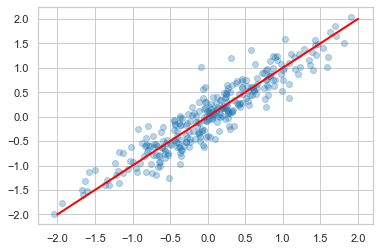

In [8]:
model=[0+1*x for x in np.arange(-2,3)] # np.arange devuelve valores espaciados uniformemente dentro de un intervalo dado

plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r'); 
plt.show()
# La línea roja indica los valores predichos de este modelo

Pero pueden existir otros modelos lineales.

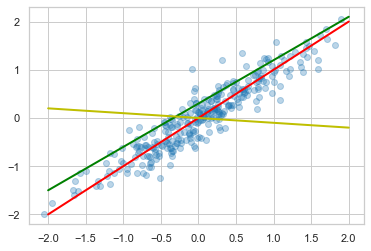

In [10]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
# Podemos utilizar varios parámetros y no sabemos cuál es el mejor modelo (bueno si lo sabemos)
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')
plt.show()

## Mínimos cuadrados ordinarios

Considere el sistema:

$$\textbf{y} = a_0+a_1 \textbf{x} $$

Ordinary Least Squares (OLS) es el **estimador** más simple y común en el que se eligen dos valores de $a$ para minimizar la suma de la distancia al cuadrado entre los valores predichos y los valores reales.

Dado el conjunto de muestras $(\textbf{x},\textbf{y})$, el objetivo es minimizar:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

Esta expresión a menudo se llama **sum of squared errors of prediction (SSE)**.

## Como calcular el OLS: Scipy.optimize

In [11]:
# Para comprender el uso de zip en el siguiente código:
list(zip([2,3,4,5,6],[40,50,60,70,80]))

[(2, 40), (3, 50), (4, 60), (5, 70), (6, 80)]

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


(0.0, 20.0)

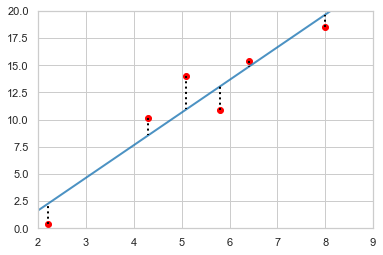

In [12]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])

# Minimiza la suma de cuadrados usando una función lambda (función anónima- Consultar)

sse = lambda b, x, y: np.sum((y - b[0] - b[1]*x) ** 2) # Almacenar la función de suma de diferencias al cuadrado

b0,b1 = fmin(sse, [0,1], args=(x,y)); # Minimizar la suma de diferencias cuadradas
# [0,1] es la estimación inicial para b [0] y b [1] en la función sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Agrega la línea de regresión, coloreada en azul
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Agrega una línea negra punteada para ilustrar los errores
plt.xlim(2, 9); plt.ylim(0, 20) # Restringe el dominio




Podemos minimizar otros criterios, como la suma de las diferencias absolutas entre los valores predichos y los valores reales (**sum of absolute errors (SAE)**).

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0.0, 20.0)

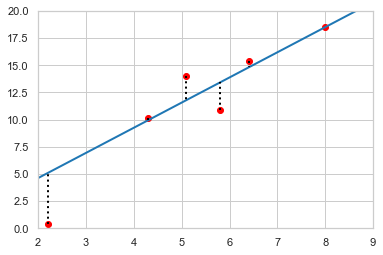

In [13]:
sabs = lambda b, x, y: np.sum(np.abs(y - b[0] - b[1]*x)) # Lambda function 
b0,b1 = fmin(sabs, [0,1], args=(x,y)) # Minimizar la suma de diferencias absolutas
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # Agrega la linea de regresión, coloreada en un azul
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Agrega una línea negra punteada para ilustrar los errores
plt.xlim(2, 9); plt.ylim(0, 20) # Restringe el dominio

Como puede ver, en este caso, los valores lejanos se penalizan menos.

**OLS es un enfoque muy utilizado por varias razones**

+ Es computacionalmente económico calcular los coeficientes.
+ Es más fácil de interpretar que los modelos más sofisticados. En situaciones en las que el objetivo es comprender un modelo simple en detalle, en lugar de estimar bien la respuesta, pueden proporcionar información sobre lo que captura el modelo.
+ Finalmente, en situaciones donde hay mucho ruido, puede ser difícil encontrar la forma funcional verdadera, por lo que un modelo restringido puede funcionar bastante bien en comparación con un modelo complejo que se ve más afectado por el ruido.

El modelo resultante se representa de la siguiente manera:

$$\widehat{\textbf{y}} = \widehat{a}_0+\widehat{a}_1 \textbf{x}$$

## Visualización de regresión lineal: Seaborn

La función ``lmplot()`` del módulo Seaborn está destinado a explorar relaciones lineales de diferentes formas en conjuntos de datos multidimensionales.

La entrada de los datos debe ser un ``DataFrame`` de Pandas.

### Ejemplo 1:  Dataset de datos macroeconómicos

In [14]:
import pandas as pd
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Datos macroeconómicos de 1947 a 1962.

Usaremos la variable ('Employed') como nuestra respuesta $\textbf{y}$ y el Producto nacional bruto ('GNP') como nuestro predictor $\textbf{x}$.

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


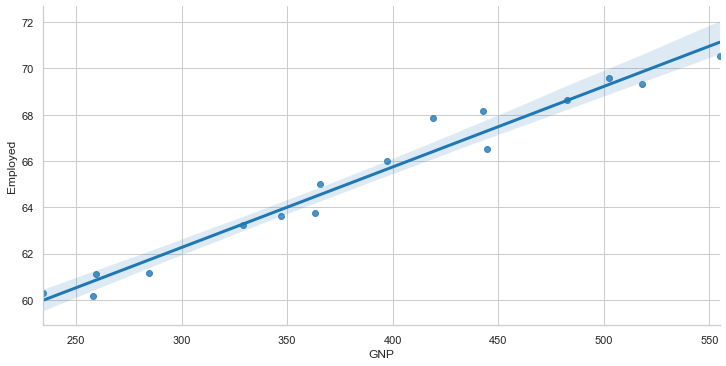

In [16]:
sns.lmplot("GNP", "Employed", df, aspect=2)

Este plot tiene dos componentes principales.

+ El primero es un diagrama de dispersión, que muestra los puntos de datos observados.
+ La segunda es una línea de regresión, que muestra el modelo lineal estimado que relaciona las dos variables. Debido a que la línea de regresión es solo una estimación, se traza con una banda de confianza del 95% para dar una impresión de la certeza en el modelo (usando Bootstraping).

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


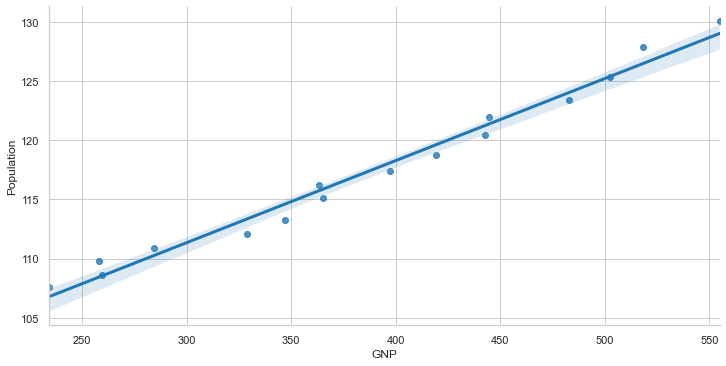

In [17]:
sns.lmplot("GNP", "Population", df, aspect=2);

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


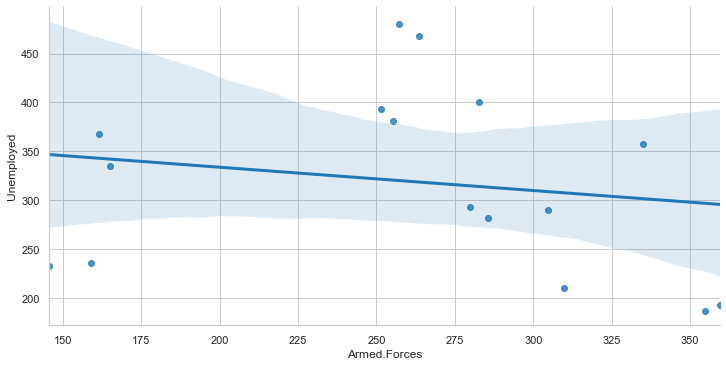

In [18]:
sns.lmplot("Armed.Forces", "Unemployed", df, aspect=2);

Podemos ver signos de no linealidad en los datos que no han sido capturados por el modelo.

Para capturar estos efectos no lineales, tenemos otro tipo de regresión conocida como regresión polinomial.

## Regresión múltiple y regresión polinomial

En una Ordinary Least Squares Regression con una sola variable describimos la relación entre el predictor y la respuesta con una línea recta. Este caso se llama regresión lineal *simple*. En el caso de la regresión lineal *múltiple*, ampliamos esta idea ajustando un hiperplano de dimensión m (m-dimensional) a nuestros predictores m.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$


A pesar de su nombre, la regresión lineal se puede utilizar para ajustar funciones no lineales. Un modelo de regresión lineal es lineal en los parámetros del modelo, no necesariamente en los predictores. Si agrega transformaciones no lineales de sus predictores al modelo de regresión lineal, el modelo será no lineal en los predictores.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

Esta técnica de regresión no lineal muy popular es la *Regresión polinomial*, una técnica que modela la relación entre la respuesta y los predictores como un polinomio de n-ésimo orden. Cuanto mayor sea el orden del polinomio, más funciones "onduladas" se pueden ajustar.

El uso de polinomios de orden superior tiene un precio: **complejidad computacional** y **sobreajuste (overfitting)**. El sobreajuste se refiere a una situación en la que el modelo se ajusta a la idiosincrasia de los datos de entrenamiento y pierde la capacidad de generalizar predicciones.

Ejemplo:

<center><img src="files/images/overfitting.png" width = '700'></center>


Podemos representar una relación curva entre nuestras variables introduciendo términos **polinomiales**, como por ejemplo, un modelo cúbico:

$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

Para ilustrar la regresión múltiple, usaremos un nuevo ejemplo (ejemplo a continuación).

Para ilustrar la regresión polinomial, se utiliza los datos macroeconómicos del ejemplo anterior:

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


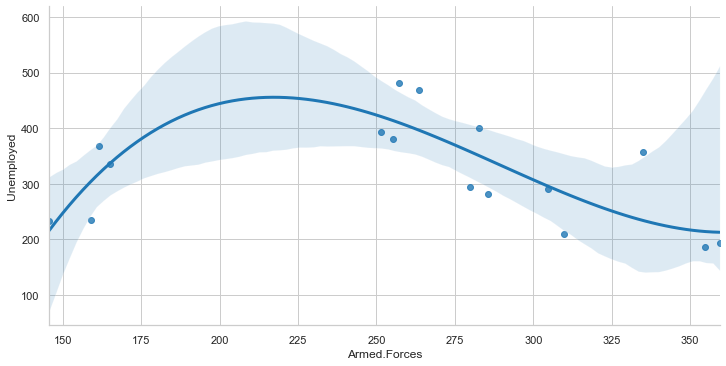

In [19]:
# Incrementar el orden para estimar una regresión polinomial
sns.lmplot("Armed.Forces", "Unemployed", df, order=3, aspect=2);

### Ejemplo 2: Datos de vivienda 

El conjunto de datos de vivienda de Boston proporciona mediciones de registros de 13 atributos de los mercados inmobiliarios de Boston, así como el precio medio. Queremos predecir el precio de un mercado dado un conjunto de atributos.


Para empezar cargamos y visualizamos los datos.

In [20]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target # Creación de las variables x e y
print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


El conjunto de datos de Boston tiene 506 instancias y 13 atributos.
Veamos el contenido del conjunto de datos que son las claves, los atributos o características y la descripción general:

In [21]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

Text(0, 0.5, 'count')

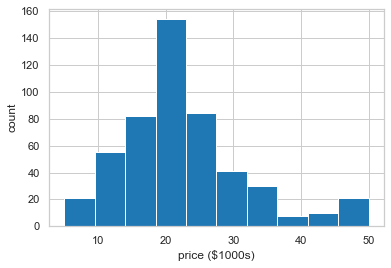

In [22]:
# Histograma de precios:
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

En primer lugar, consideramos la tarea de predecir los valores medios de las viviendas en el área de Boston utilizando como predictor uno de los atributos, por ejemplo, LSTAT, definido como la "proporción de menor estatus de la población".
La visualización de Seaborn se puede utilizar para mostrar fácilmente estas relaciones lineales:

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


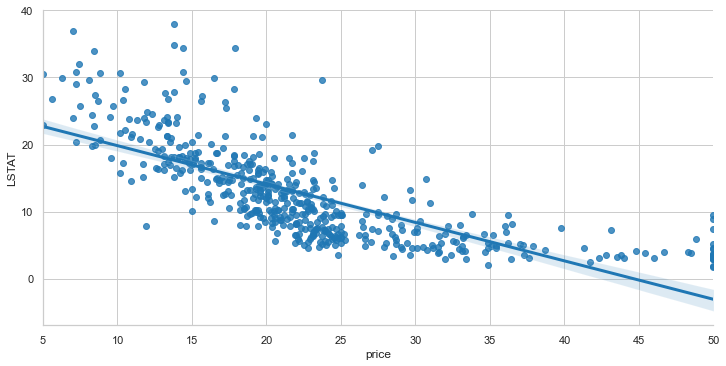

In [23]:
# Visualización de las relaciones entre precio y LSTAT
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Creación de un DataFrame a partir del dataset de Boston
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston, aspect=2);

¿La relación entre el precio de la vivienda y ``lstat`` no es lineal? ¿La línea recta no encaja bien? Quizás se pueda obtener un mejor ajuste al incluir términos de orden superior:

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


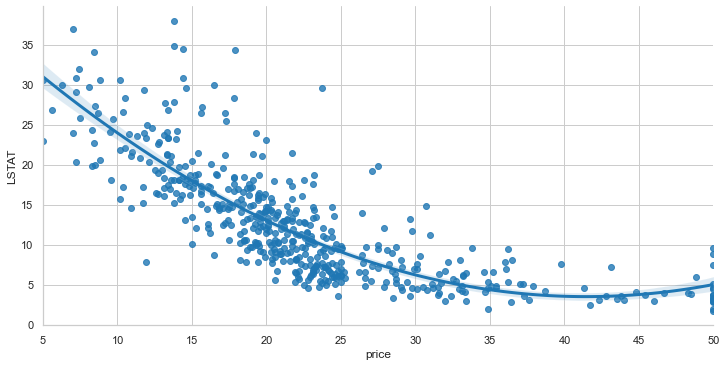

In [24]:
# Estimar una regresión polinomial de orden 2
sns.lmplot("price", "LSTAT", df_boston, order=2, aspect=2);

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


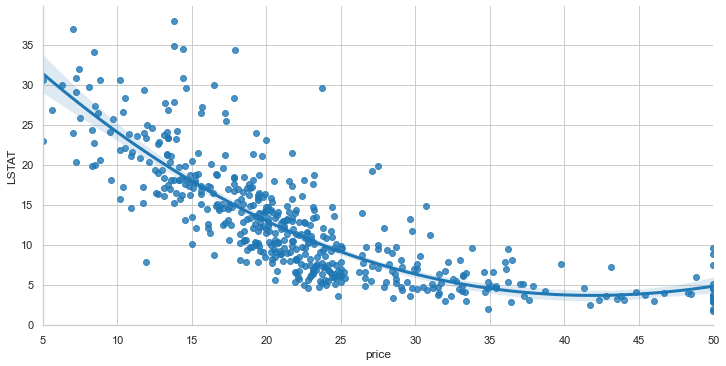

In [25]:
# Estimar una regresión polinomial de orden 3
sns.lmplot("price", "LSTAT", df_boston, order=3, aspect=2);

Que tal si consideramos las variable RN o AGE?

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


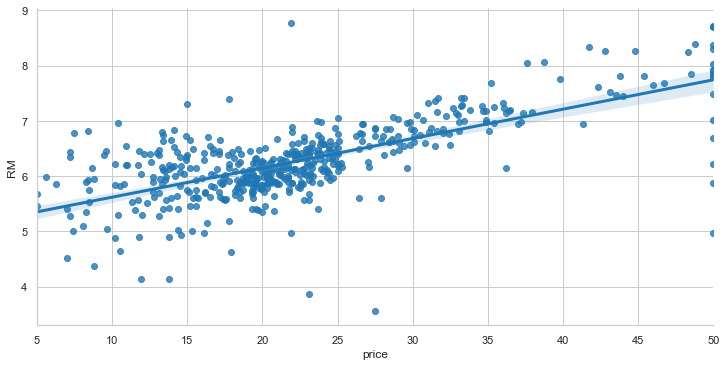

In [26]:
# Visualización de las relaciones entre precio y "número medio de habitaciones por vivienda"
sns.lmplot("price", "RM", df_boston, aspect=2);

C:\Users\ctipa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


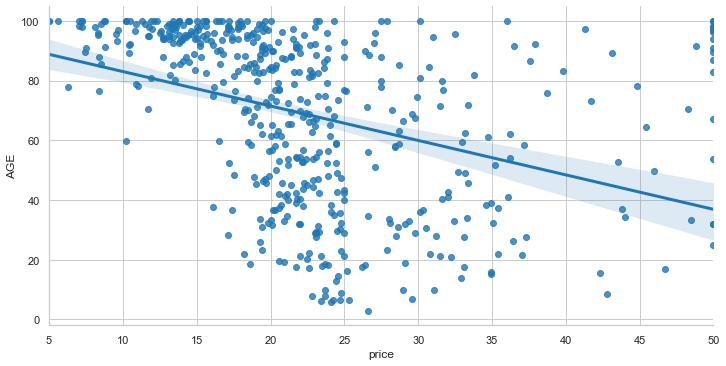

In [27]:
# Visualización de las relaciones entre precio y "proporción de unidades ocupadas por sus propietarios construidas antes de 1940"
sns.lmplot("price", "AGE", df_boston, aspect=2);

## Más visualizaciones

### Heatmap

También podemos usar la función corr de Pandas y la función de mapa de calor de Seaborn para estudiar la relación de las variables, trazando una matriz de correlación diagonal.

<AxesSubplot:>

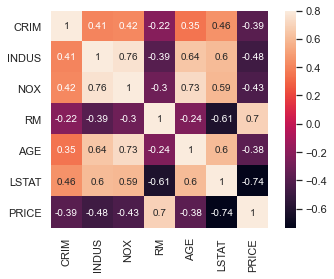

In [28]:
indexes=[0,2,4,5,6,12] # Para graficar solo 7 de las 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df_boston2['PRICE'] = boston.target
corrmat = df_boston2.corr()
# Dibujar el mapa de calor usando seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

El coeficiente de correlación varía de -1 a 1. Si el valor se acerca a 1, significa que existe una fuerte correlación positiva entre las dos variables. Cuando está cerca de -1, las variables tienen una fuerte correlación negativa.

### Scatter plot matrix

Exploremos las relaciones de múltiples variables usando una *Scatter plot matrix* (matriz de diagrama de dispersión). El gráfico de dispersión es una cuadrícula de gráficos de múltiples variables una contra la otra, que muestra la relación por pares de cada variable con las demás.

Para la visualización, elegimos 3 variables del conjunto de 13 variables:

In [29]:
print(boston.feature_names)
indexes3=[5,6,12]
print(boston.feature_names[indexes3])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


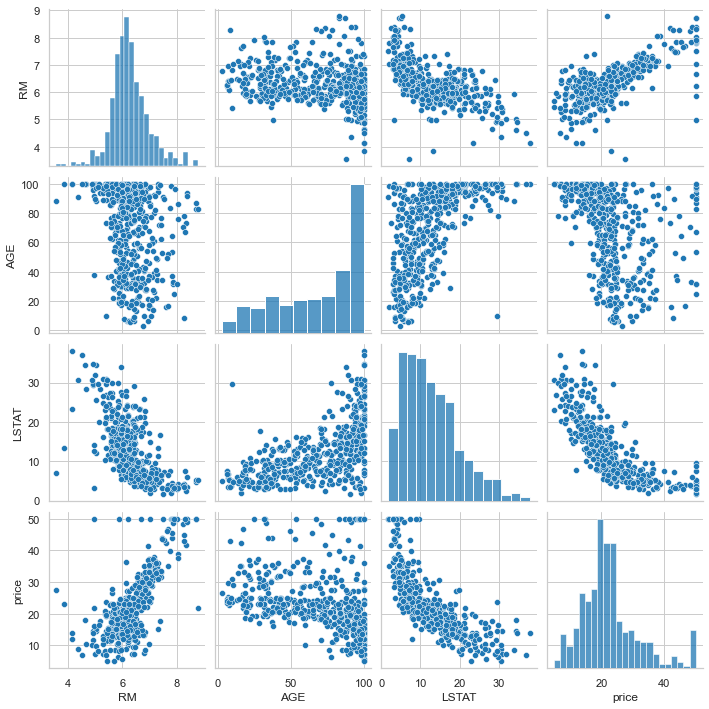

In [30]:
df_boston3 = pd.DataFrame(boston.data[:,indexes3], columns=boston.feature_names[indexes3])
df_boston3['price'] = boston.target
sns.pairplot(df_boston3) # Ploteo de las relaciones por pares en el conjunto de datos

Podemos analizar visualmente las relaciones por pares en los diagramas de dispersión. El eje diagonal contiene un gráfico para mostrar la distribución univariante de los datos de la variable en esa columna.

Puede crear la misma matriz de diagrama de dispersión utilizando la scatter_matrix method en pandas.tools.plotting:

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='AGE', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='price', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='AGE'>,
        <AxesSubplot:xlabel='price', ylabel='AGE'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='AGE', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='price', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='RM', ylabel='price'>,
        <AxesSubplot:xlabel='AGE', ylabel='price'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

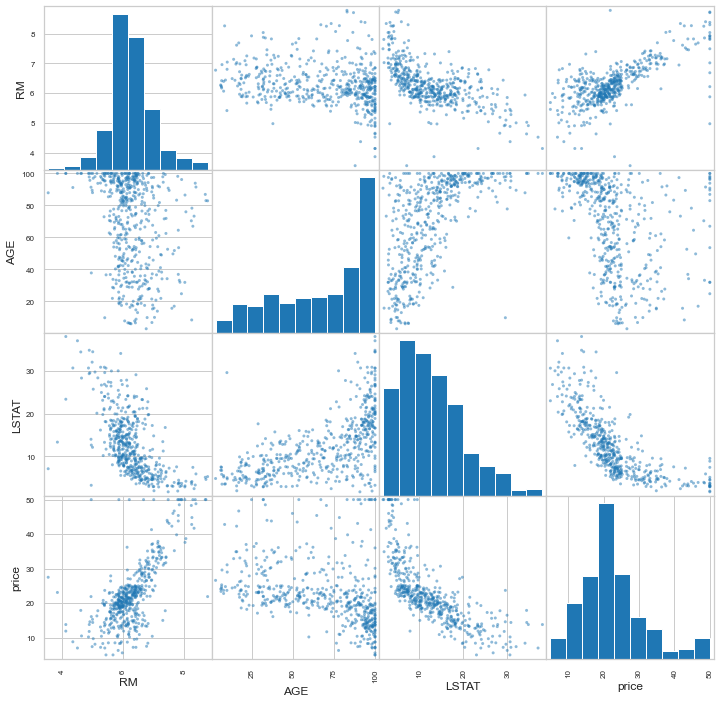

In [31]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

## Predicción y evaluación cuantitativa

### Interpolación vs extrapolación

En la práctica, cuando hacemos predicciones para algún valor de x que no hemos visto antes, debemos tener mucho cuidado. Predecir $y$ para un valor de $x$ que está dentro del intervalo de puntos que vimos en los datos originales (los datos con los que ajustamos nuestro modelo) se llama **interpolación**. La predicción de $y$ para un valor de x que está fuera del rango de valores que realmente vimos para $x$ en los datos originales se llama **extrapolación**.

Para conjuntos de datos reales, incluso si un ajuste lineal parece apropiado, debemos tener mucho cuidado con la extrapolación, que a menudo puede conducir a predicciones falsas.


<center><img src="files/images/extrapolation.png"  width="500"></center>


### Predicción

Utilicemos la librería **Scikit-learn**. 

Scikit-learn es una librería que proporciona una variedad de técnicas de aprendizaje automático supervisadas y no supervisadas. Scikit-learn proporciona una interfaz orientada a objetos centrada en el concepto de un Estimador.

El métodos <code>Estimator.fit</code> establece el estado del estimador en función de los *datos de entrenamiento (training set)*. Por lo general, los datos estan almacenando en un arreglo (e.g., numpy) $X$ de tamaño (shape) <code>(n_samples, n_predictors)</code> que contiene la llamada *matriz de características (feautures)* y una matriz (e.g., numpy) unidimensional $\textbf{y}$ que contiene las *respuestas*. Algunos estimadores permiten al usuario controlar el comportamiento de ajuste.

Los estimadores que pueden generar predicciones proporcionan un método ``Estimator.predict``. En el caso de un análisis de regresión, ``Estimator.predict`` devolverá los valores de regresión predichos, $\widehat{\textbf{y}}$. 

Durante el proceso de ajuste, el estado del estimador se almacena en los atributos de instancia que tienen un guión bajo al final (``'_'``). Por ejemplo, los coeficientes de un estimador de ``LinearRegression`` se almacenan en el atributo ``coef_``. Veamos un ejemplo:

In [34]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Crear el estimador de regresión lineal
X=[[0, 1], [1, 1], [2, 1]]
y=[0, 1, 2]
reg.fit(X, y)  # Realizar el ajuste (fitting)
reg.coef_

array([1., 0.])

### Evaluación

Podemos evaluar el ajuste del modelo calculando el mean squared error ($MSE$) y el coeficiente de determinación ($R^2$) del modelo.

El coeficiente $R^2$ se define como $(1 - \textbf{u}/\textbf{v})$, donde  $\textbf{u}$ es es la suma residual de cuadrados: $$\textbf{u}=\sum (\textbf{y} - \widehat{\textbf{y}} )^2$$ donde ${\textbf{y}}$ es la respuesta observada y $\widehat{\textbf{y}}$ es la respuesta predicha (estimada).

Y $\textbf{v}$ es la suma total de cuadrados: $$\textbf{v}=\sum (\textbf{y} - \bar{\textbf{y}})^2,$$ donde $\bar{\textbf{y}}$ es la media de los datos observados.

La mejor puntuación posible para $R^2$ es 1.0 (cuando $\textbf{u}=0$): los valores más bajos son peores. $R^2$ es 0.0 cuando $\textbf{u}=\textbf{v}$.


**Continuemos con el ejemplo de la vivienda en Boston**:

Dividiremos los datos de Boston en conjunto de entrenamiento y conjunto de prueba:

In [29]:
train_size = np.floor(X_boston.shape[0]/2)
int(train_size)

253

In [30]:
X_boston.shape

(506, 13)

In [35]:
train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))

regr_boston = LinearRegression()  # Crear el estimador de regresión lineal
regr_boston.fit(X_train, y_train) # Realizar el ajuste
print('Coeff and intercept: {} {}'.format(regr_boston.coef_, regr_boston.intercept_))

# Calcular puntaje (Score) para conjuntos de entrenamiento y prueba
# La mejor puntuación posible es 1.0, los valores más bajos son peores.
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))
# Calcular MSE para conjuntos de entrenamiento y prueba 
print('Training MSE: {}'.format(np.mean((regr_boston.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_boston.predict(X_test) - y_test)**2)))

Train and test sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.01743058294517
Training Score: 0.8557827200735684
Testing Score: -2.2527343423925164
Training MSE: 9.987517325463742
Testing MSE: 303.43686292658856


Tenga en cuenta que la puntuación del método devuelve el coeficiente de determinación R^2 de la predicción.

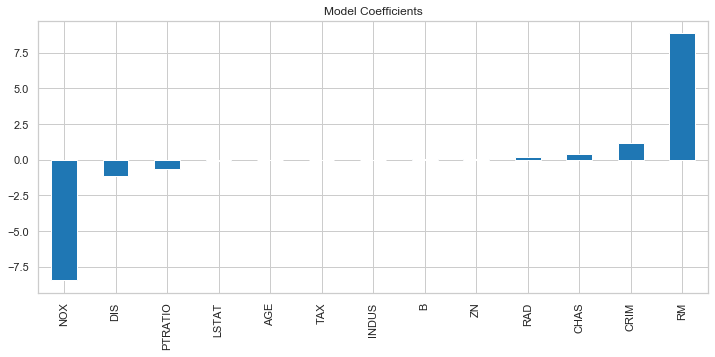

In [32]:
# Ploteando los coeficiente del modelo
from pandas import Series

coef = Series(regr_boston.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Podemos ver que todos los coeficientes obtenidos son distintos de cero, lo que significa que no se descarta ninguna variable.

**Gráficos para la evaluación de ajuste:**

A menudo podemos aprender mucho sobre qué tan bien funcionó nuestro modelo al analizar las predicciones y los residuos con dos gráficos interesantes:

- Un diagrama de dispersión de los valores observados $y$ versus el valor predicho $\hat y$ 
- Un diagrama de dispersión de los residuos (restos) $y_i - \hat y_i$ vs. $\hat y_i$.

En ambos casos podemos agregar una línea para mostrar cuál sería el resultado perfecto.

Text(0, 0.5, 'Predicted price ($1000s)')

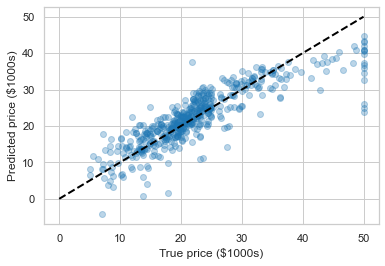

In [36]:
regr_boston_all = LinearRegression() # Crear el estimador de regresión lineal
regr_boston_all.fit(boston.data, boston.target) # Ajustar con todos los datos (no solo los datos de entrenamiento) y todas las funciones
predicted = regr_boston_all.predict(boston.data) # Realizar predicción de todos los datos.

# Visualization de las repouestas y los valores predichos:
plt.scatter(boston.target, predicted, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

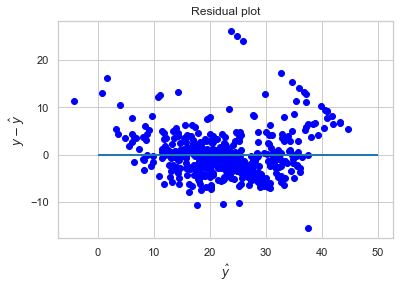

In [37]:
x_plot = plt.scatter(predicted, (boston.target-predicted), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

Intuitivamente, si el modelo es bueno, el grafico (plot) de los residuos ($y_i - \hat y_i$) contra los valores ajustados (\hat y_i) debe lucir como ruido (i.e., no debe existir un patrón visible).

Evaluación del modelo:

In [38]:
print('Score: {}'.format(regr_boston_all.score(boston.data, boston.target)))  # Mejor posible score es 1.0, valores menores son peores.

Score: 0.7406426641094094


In [40]:
# Score utilizando una característica (feature) simple
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(boston.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694722
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.1113013926694113
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475491
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464


## Evaluación estadística

El paquete ``statsmodels`` proporciona varias clases que brindan diferentes opciones para la regresión lineal. Comenzar con la regresión lineal es bastante sencillo con el módulo OLS.

Podemos realizar la regresión del predictor sobre la respuesta, usando la clase ``sm.OLS`` y si método de inialización ``OLS(y, X)``. Este método toma como entrada dos objetos tipo array: $X$ y $\textbf{y}$. En general, $X$ será un array numpy o un data frame de pandas de tamaño (shape) ``(n, p)`` ,donde $n$ es el número de puntos de datos y $p$ es el número de predictores. $\textbf{y}$ puede ser un array uni-dimensiona numpy o una serie de pandas de longitud $n$.

In [51]:
import statsmodels.api as sm
X2 = X_boston[:,12] # Usemos la columna 12 (LSTAT) para realizar una regresión:
X12 = sm.add_constant(X2)  # Agrega un término constante al predictor
est = sm.OLS(y_boston, X2) # Crea un estimador de objetos OLS
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                    2.71e-67
Time:                        19:54:40   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ejercicio: Advertising dataset**<p>


En el siguiente ejemplo usaremos el [advertising dataset](https://www.kaggle.com/purbar/advertising-data/data) que consiste en la venta de productos y su presupuesto publicitario en tres medios diferentes TV, radio, periódico.<p>

**¿Existe una relación lineal entre las ventas de productos y el presupuesto publicitario en TV, radio o periódicos?**<p>

Conjunto de datos del libro: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
file = 'files/ch06/Advertising.csv'
df_adv = pd.read_csv(file, index_col=0)

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Podemos mostrar esto para dos variables predictoras en una gráfica tridimensional.

<Figure size 432x288 with 0 Axes>

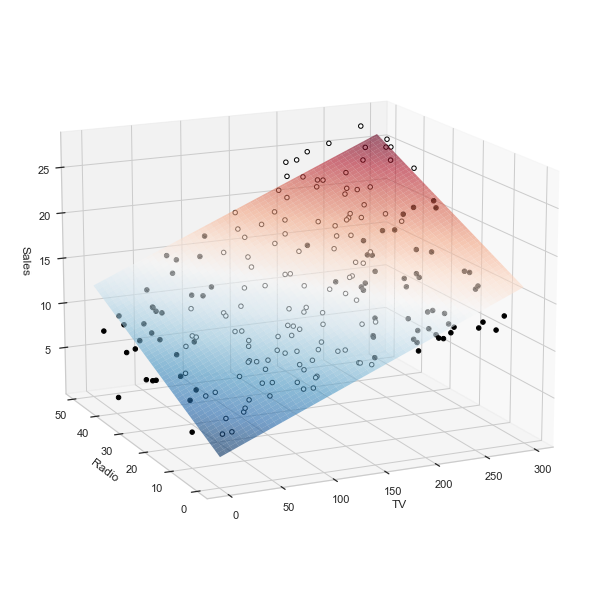

<Figure size 432x288 with 0 Axes>

In [54]:
from mpl_toolkits.mplot3d import Axes3D

## Ajustar un modelo OLS con intercepción en TV y Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Creación de un gráfico en 3d 
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# Ploteo del hiperplano evaluando los parámetros en la cuadrícula
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# Creación de un matplotlib 3d 
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15) # azim, almacena el ángulo de acimut en el plano x, y; elev, almacena el ángulo de elevación en el plano z 

# Ploteo del hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0) # cmap, crea un colormap
# linewidth=0, permite no dibujar líneas en la superficie

# Plot de los data points - puntos sobre el HP son blancos, los puntos debajo son blancos
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# Labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.figure()

## Logistic Regresion (Scikit-learn)

**Logistic regression** o logit regression es un tipo de modelo de clasificación estadística probabilística. También se utiliza para predecir una respuesta binaria de un predictor binario, utilizado para predecir el resultado de una variable dependiente dicotómica (es decir, una etiqueta de clase) basada en una o más variables predictoras (características). 

(Source: *Wikipedia*)

La función logística es:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

La función logística es útil porque puede tomar una entrada con cualquier valor desde infinito negativo hasta infinito positivo, mientras que la salida se limita a valores entre 0 y 1 y, por lo tanto, se puede interpretar como una probabilidad.

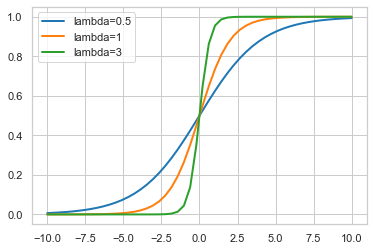

In [55]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10,10) # 50 puntos igualmente espaciados de -10 a 10
t = logist(x,0.5)
y = logist(x,1)
z = logist(x,3)
plt.plot(x,t, label='lambda=0.5')
plt.plot(x,y, label='lambda=1')
plt.plot(x,z, label='lambda=3')
plt.legend(loc='upper left')



En la regresión logística, la variable x se considera una función lineal de una variable explicativa x_1, de la siguiente manera:

$$ f(x) = \frac{1}{1+e^{- \lambda (a_0 + a_1 x_1)}}$$

<ipython-input-56-6c1725ff207d>:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(-4.0, 4.0)

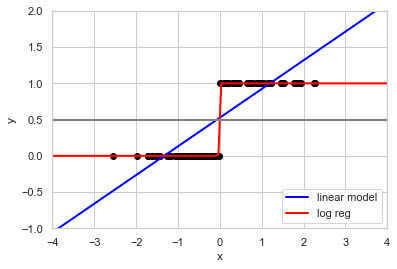

In [56]:
from sklearn import linear_model

xmin, xmax = -10, 10
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples) # Creación de 100 números aleatorios a partir de una distribución normal.
y = (X > 0).astype(np.float) # y contiene 0 para X negativo y 1 para X positivo
X = X[:, np.newaxis] 

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)

X_test = np.linspace(-10, 10, 300)

# Ploteo de la línea de regresión en azul
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color='blue', linewidth=2, label='linear model')


# Logistic Regression:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, y)

def lr_model(x):
    return 1 / (1 + np.exp(-x))

loss = lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel() 

plt.plot(X_test, loss, color='red', linewidth=2, label='log reg') # Ploteo del ajuste de la regresión logística en rojo

plt.axhline(0.5, color='grey') 

plt.scatter(X, y, color='black')

plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-4, 4)

